In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
data='Mall_Customers.csv'
df=pd.read_csv(data)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
plt.scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"])

In [ ]:
clustering=KMeans(n_clusters=5)

y_predicted=clustering.fit_predict(df[["Spending Score (1-100)","Annual Income (k$)"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df["cluster"]=y_predicted
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


Text(0, 0.5, 'Annual Income')

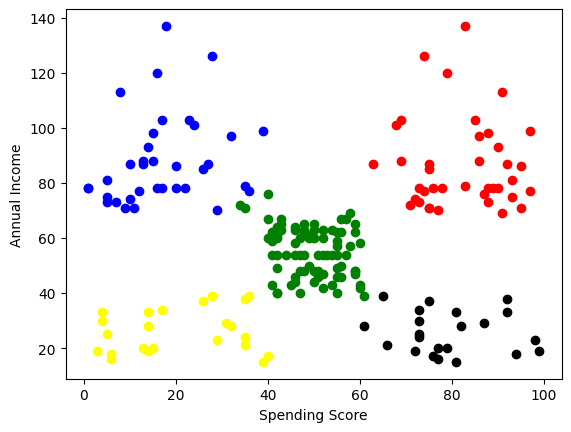

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

plt.scatter(df1["Spending Score (1-100)"],df1["Annual Income (k$)"],color='green')
plt.scatter(df2["Spending Score (1-100)"],df2["Annual Income (k$)"],color='blue')
plt.scatter(df3["Spending Score (1-100)"],df3["Annual Income (k$)"],color='red')
plt.scatter(df4["Spending Score (1-100)"],df4["Annual Income (k$)"],color='yellow')
plt.scatter(df5["Spending Score (1-100)"],df5["Annual Income (k$)"],color='black')

plt.xlabel('Spending Score')
plt.ylabel('Annual Income')

**Scaling the Feature Values**

In [ ]:
scaler=MinMaxScaler()

df['Spending Score (1-100)']=scaler.fit_transform(df[['Spending Score (1-100)']])
df["Annual Income (k$)"]=scaler.fit_transform(df[['Annual Income (k$)']])

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,3
1,2,Male,21,0.000000,0.816327,4
2,3,Female,20,0.008197,0.051020,3
3,4,Female,23,0.008197,0.775510,4
4,5,Female,31,0.016393,0.397959,3


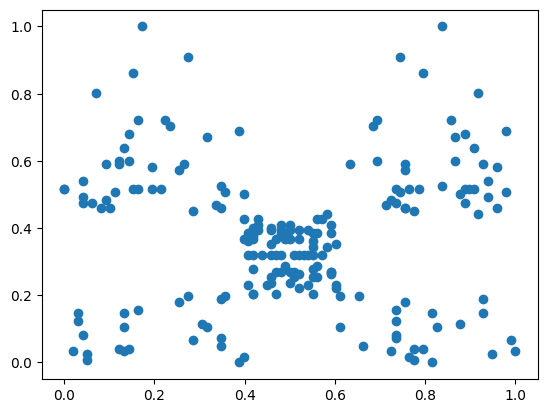

In [ ]:
plt.scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"])

In [ ]:
km=KMeans(n_clusters=5)
y_predicted=km.fit_predict(df[['Spending Score (1-100)',"Annual Income (k$)"]])
df.cluster=y_predicted
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,1
1,2,Male,21,0.000000,0.816327,4
2,3,Female,20,0.008197,0.051020,1
3,4,Female,23,0.008197,0.775510,4
4,5,Female,31,0.016393,0.397959,1


In [ ]:
km.cluster_centers_

array([[0.82783883, 0.58638083],
       [0.20319432, 0.09265859],
       [0.16443149, 0.6       ],
       [0.49508692, 0.33029751],
       [0.79962894, 0.08792846]])

In [ ]:
centres  = pd.DataFrame(km.cluster_centers_)

In [ ]:
centres[0]


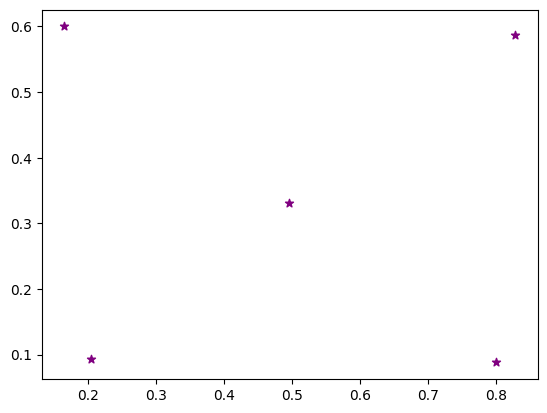

In [ ]:
plt.scatter(centres[0],centres[1],color='purple',marker='*')

Text(0, 0.5, 'Annual Income')

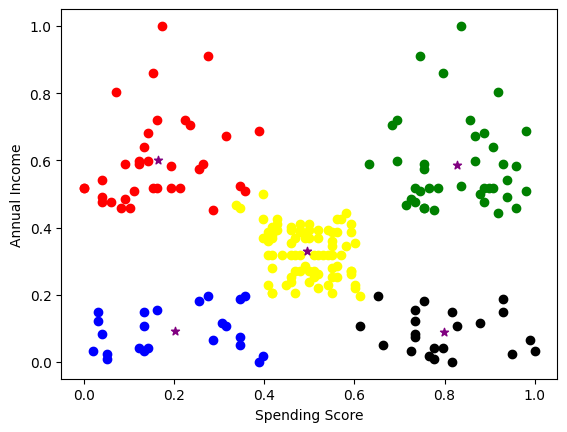

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

plt.scatter(df1["Spending Score (1-100)"],df1["Annual Income (k$)"],color='green')
plt.scatter(df2["Spending Score (1-100)"],df2["Annual Income (k$)"],color='blue')
plt.scatter(df3["Spending Score (1-100)"],df3["Annual Income (k$)"],color='red')
plt.scatter(df4["Spending Score (1-100)"],df4["Annual Income (k$)"],color='yellow')
plt.scatter(df5["Spending Score (1-100)"],df5["Annual Income (k$)"],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')

plt.xlabel('Spending Score')
plt.ylabel('Annual Income')

Finding Optimal K value

In [ ]:
k_rng=range(1,11)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Spending Score (1-100)',"Annual Income (k$)"]])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

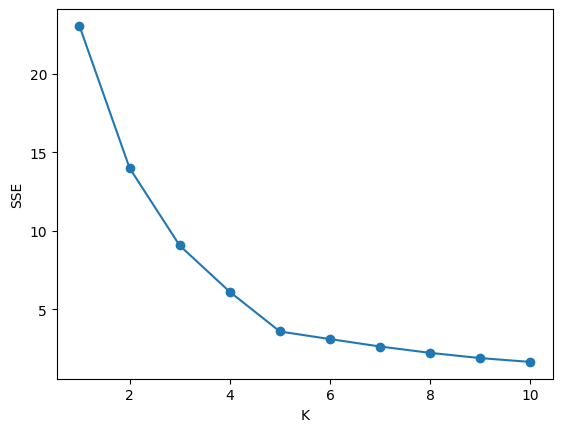

In [ ]:
plt.xlabel('K')
plt.ylabel('SSE')

plt.plot(k_rng,sse)
plt.scatter(k_rng,sse)